# Random Forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [4]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Loading the Dataset
path = '/content/drive/MyDrive/Random forest SVM Decision trees/data.txt'
df = pd.read_csv(path,sep=',')
df.columns = ['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13','target_class']
df.head()
inputs=df.drop('target_class',axis='columns')

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target_class
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0


In [7]:
inputs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74


In [8]:
# Create the model with 100 trees
model = RandomForestClassifier()

In [9]:
# Check missing values by each column and removing missing values if any
pd.isnull(inputs).sum()
inputs_dropna = inputs.dropna(axis=0, how='any')
pd.isnull(inputs_dropna).sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

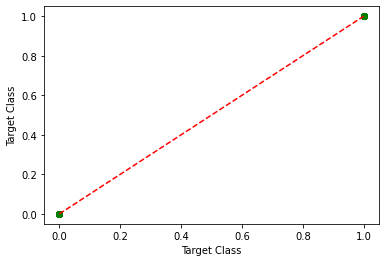

In [10]:

# Draw scatter plot between 2 target classes
x = df['target_class']
y = df['target_class']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Target Class')
plt.ylabel('Target Class')

plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [12]:
# Dataset with imputation
Y = df['target_class'].values # Target for the model
X = df[['1', '2', '3', '4', '5', '6', '7', '8' , '9' , '10' , '11' , '12' , '13']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

In [13]:
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Dataset after dropping missing value rows
Y = df['target_class'].values # Target for the model
X = df[['1', '2', '3', '4', '5', '6', '7', '8' , '9' , '10' , '11' , '12' , '13']] # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [15]:
best_score = 0
kfolds=2
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
acc=[]

In [16]:
for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,max_depth=m, random_state=0)
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m
                # Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.827042905465551
Best parameters of M, d, m are:  14 8 8
Test accuracy with the best parameters is 0.8202937249666221
Test recall with the best parameters is: 0.7361111111111112
Test AUC with the best parameters is: 0.8142627940285352


In [17]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['1', '0.11875000857860037'],
       ['2', '0.035471649483839574'],
       ['3', '0.04202421284209077'],
       ['4', '0.04120335885141895'],
       ['5', '0.19086307138150677'],
       ['6', '0.18824013370251594'],
       ['7', '0.053719309829332304'],
       ['8', '0.014168623271345982'],
       ['9', '0.0511891757186045'],
       ['10', '0.03475985929489411'],
       ['11', '0.05287692771439456'],
       ['12', '0.0761819705733628'],
       ['13', '0.10055169875809343']], dtype='<U20')

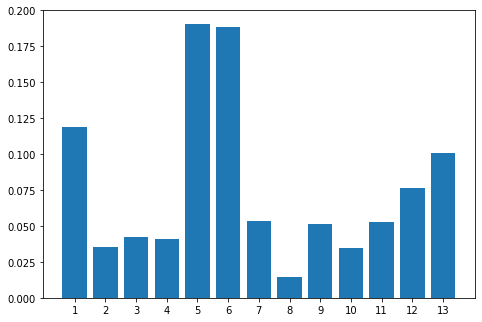

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Columns = ['1', '2', '3', '4', '5' , '6', '7', '8', '9', '10' , '11' , '12' , '13']
Feature_Importance = [0.11875000857860037,0.035471649483839574,0.04202421284209077,0.04120335885141895,0.19086307138150677,0.18824013370251594,0.053719309829332304,0.014168623271345982,0.0511891757186045,0.03475985929489411,0.05287692771439456,0.0761819705733628,0.10055169875809343]
ax.bar(Columns,Feature_Importance)
plt.show()

In [19]:
from sklearn import metrics

# PredictedOutput = RandomForestClassifier.predict(X_test)
PredictedOutput = SelectedRFModel.predict(X_test_scaled)

print("Accuracy:",metrics.accuracy_score(Y_test_dna, PredictedOutput))
print("Confusion_Matrix",metrics.confusion_matrix(Y_test_dna, PredictedOutput))
print("classification_report",metrics.classification_report(Y_test_dna, PredictedOutput))

Accuracy: 0.8202937249666221
Confusion_Matrix [[1800  217]
 [ 456 1272]]
classification_report               precision    recall  f1-score   support

           0       0.80      0.89      0.84      2017
           1       0.85      0.74      0.79      1728

    accuracy                           0.82      3745
   macro avg       0.83      0.81      0.82      3745
weighted avg       0.82      0.82      0.82      3745

